In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, mean_squared_error,
                             mean_absolute_error, f1_score,
                             r2_score, precision_recall_curve, roc_curve, auc)
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from collections import OrderedDict


In [2]:
data = pd.read_csv('../CSV/full_data_flightdelay.csv')

In [3]:
data = data.sample(n = 500_000, random_state = 42).reset_index(drop = True)

In [4]:
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,5,0,1500-1559,3,4,27,69,"Midwest Airline, Inc.",11965,...,11,Ronald Reagan Washington National,38.852,-77.037,Eppley Airfield,0.00,0.0,0.0,68.0,4.47
1,9,7,0,2200-2259,5,1,7,128,American Airlines Inc.,6740,...,6,Miami International,25.792,-80.286,NONE,0.00,0.0,0.0,94.0,5.82
2,12,1,0,1900-1959,3,5,15,76,Endeavor Air Inc.,5359,...,5,Raleigh-Durham International,35.875,-78.782,Tampa International,0.00,0.0,0.0,50.0,7.83
3,8,3,0,1700-1759,6,2,22,276,United Air Lines Inc.,11012,...,17,Newark Liberty International,40.696,-74.172,San Francisco International,1.69,0.0,0.0,84.0,4.25
4,9,5,0,0800-0859,2,1,3,76,Mesa Airlines Inc.,1378,...,2,Tulsa International,36.198,-95.890,NONE,0.00,0.0,0.0,95.0,6.26


In [5]:
data.isnull().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [6]:
columns = [
    'MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
    'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME',
    'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
    'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
    'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT',
    'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND'
]
data = data[columns]

data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,5,0,1500-1559,3,4,27,69,"Midwest Airline, Inc.",11965,...,0.000001,0.000124,11,Ronald Reagan Washington National,Eppley Airfield,0.00,0.0,0.0,68.0,4.47
1,9,7,0,2200-2259,5,1,7,128,American Airlines Inc.,6740,...,0.000098,0.000177,6,Miami International,NONE,0.00,0.0,0.0,94.0,5.82
2,12,1,0,1900-1959,3,5,15,76,Endeavor Air Inc.,5359,...,0.000000,0.000094,5,Raleigh-Durham International,Tampa International,0.00,0.0,0.0,50.0,7.83
3,8,3,0,1700-1759,6,2,22,276,United Air Lines Inc.,11012,...,0.000254,0.000229,17,Newark Liberty International,San Francisco International,1.69,0.0,0.0,84.0,4.25
4,9,5,0,0800-0859,2,1,3,76,Mesa Airlines Inc.,1378,...,0.000000,0.000091,2,Tulsa International,NONE,0.00,0.0,0.0,95.0,6.26


In [7]:
data.dropna(inplace=True)

In [8]:
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,5,0,1500-1559,3,4,27,69,"Midwest Airline, Inc.",11965,...,0.000001,0.000124,11,Ronald Reagan Washington National,Eppley Airfield,0.00,0.0,0.0,68.0,4.47
1,9,7,0,2200-2259,5,1,7,128,American Airlines Inc.,6740,...,0.000098,0.000177,6,Miami International,NONE,0.00,0.0,0.0,94.0,5.82
2,12,1,0,1900-1959,3,5,15,76,Endeavor Air Inc.,5359,...,0.000000,0.000094,5,Raleigh-Durham International,Tampa International,0.00,0.0,0.0,50.0,7.83
3,8,3,0,1700-1759,6,2,22,276,United Air Lines Inc.,11012,...,0.000254,0.000229,17,Newark Liberty International,San Francisco International,1.69,0.0,0.0,84.0,4.25
4,9,5,0,0800-0859,2,1,3,76,Mesa Airlines Inc.,1378,...,0.000000,0.000091,2,Tulsa International,NONE,0.00,0.0,0.0,95.0,6.26


In [9]:
data.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,PRCP,SNOW,SNWD,TMAX,AWND
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,6.611876,3.934214,0.190432,3.817086,3.044816,27.893012,133.732678,12700.896682,62924.675398,3467.155206,1.590380e+06,7.811177e+06,0.000097,0.000136,11.535284,0.104124,0.031051,0.092593,71.468186,8.340451
std,3.399382,1.994697,0.392642,2.380555,1.760588,21.520965,46.424868,8847.232379,34396.105174,4259.914245,1.125068e+06,5.048716e+06,0.000086,0.000047,6.932740,0.341081,0.311726,0.729642,18.340980,3.610767
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,1100.000000,5582.000000,1.000000,7.047600e+04,4.737940e+05,0.000000,0.000007,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,4.000000,2.000000,0.000000,2.000000,2.000000,11.000000,90.000000,5353.000000,24966.000000,652.000000,6.732210e+05,2.688839e+06,0.000034,0.000099,5.000000,0.000000,0.000000,0.000000,59.000000,5.820000
50%,7.000000,4.000000,0.000000,3.000000,3.000000,23.000000,143.000000,11587.000000,70878.000000,2257.000000,1.486066e+06,8.501631e+06,0.000062,0.000125,12.000000,0.000000,0.000000,0.000000,74.000000,7.830000
75%,10.000000,6.000000,0.000000,5.000000,4.000000,39.000000,172.000000,17615.000000,86312.000000,4834.000000,2.006675e+06,1.246018e+07,0.000144,0.000177,17.000000,0.020000,0.000000,0.000000,86.000000,10.290000
max,12.000000,7.000000,1.000000,11.000000,15.000000,109.000000,337.000000,35256.000000,117728.000000,21837.000000,4.365661e+06,1.338300e+07,0.000348,0.000229,32.000000,11.630000,17.200000,25.200000,115.000000,33.780000


In [10]:
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
data.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

Number of duplicate rows: 195
Number of duplicate rows after removal: 0


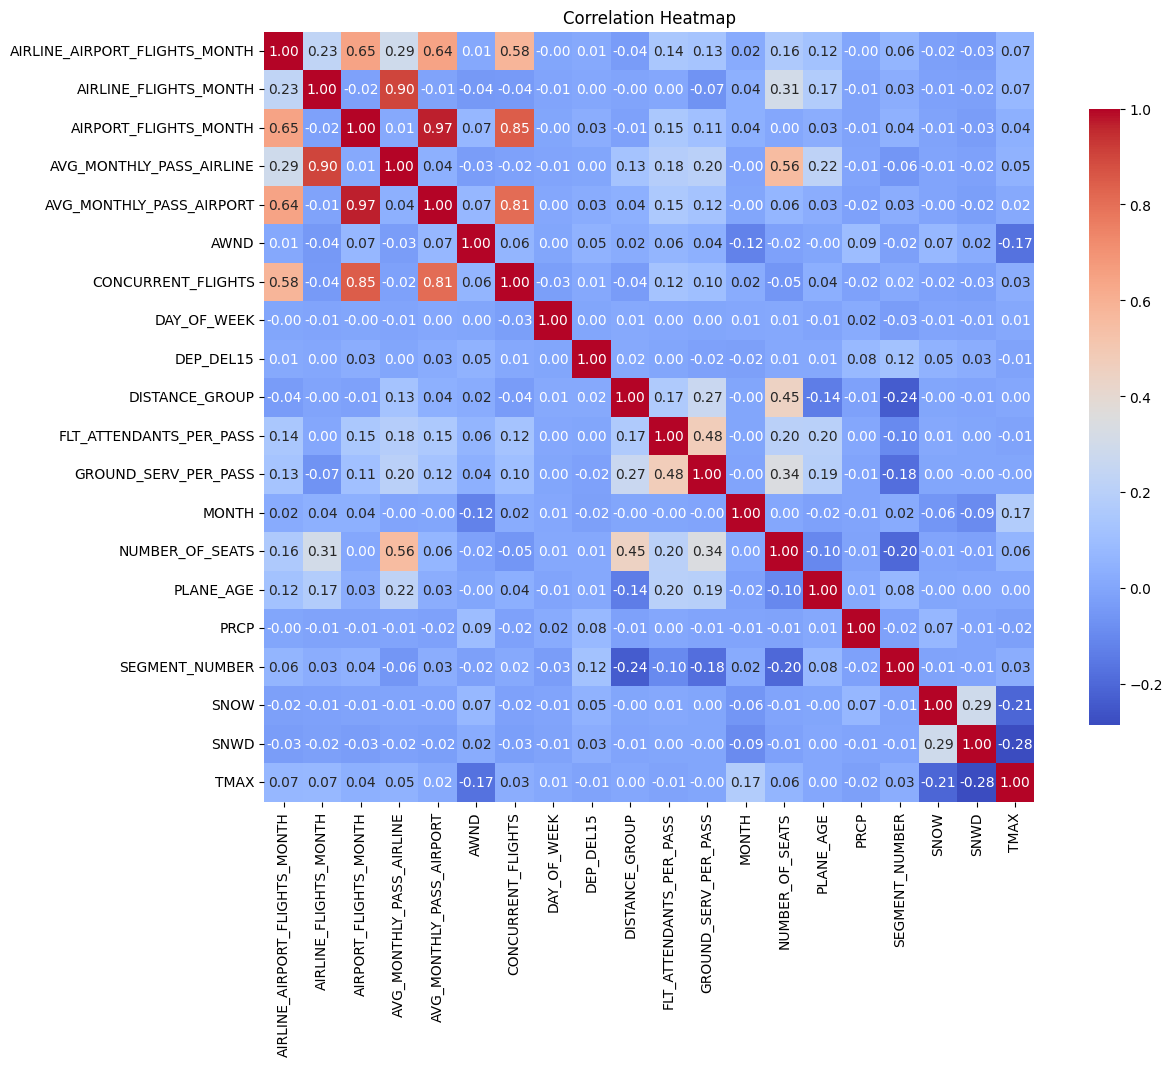

In [11]:
excluded_cols = ['CARRIER_NAME_missing', 'DEPARTING_AIRPORT_missing', 'PREVIOUS_AIRPORT_missing']
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_cols)

correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap')
plt.show()

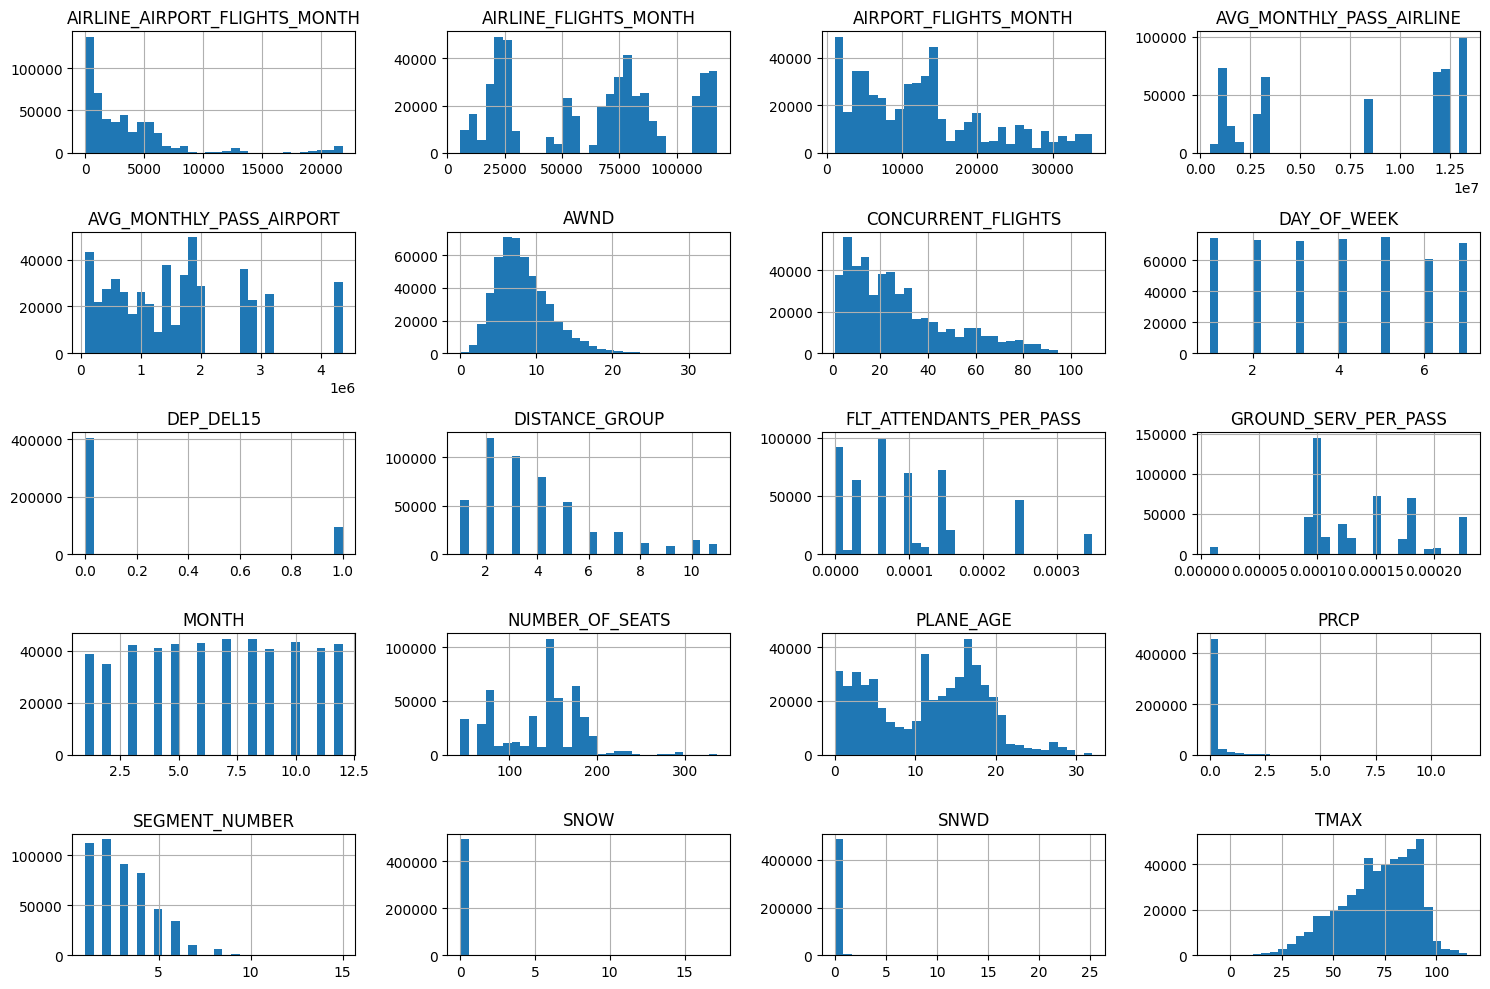

In [12]:
data[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

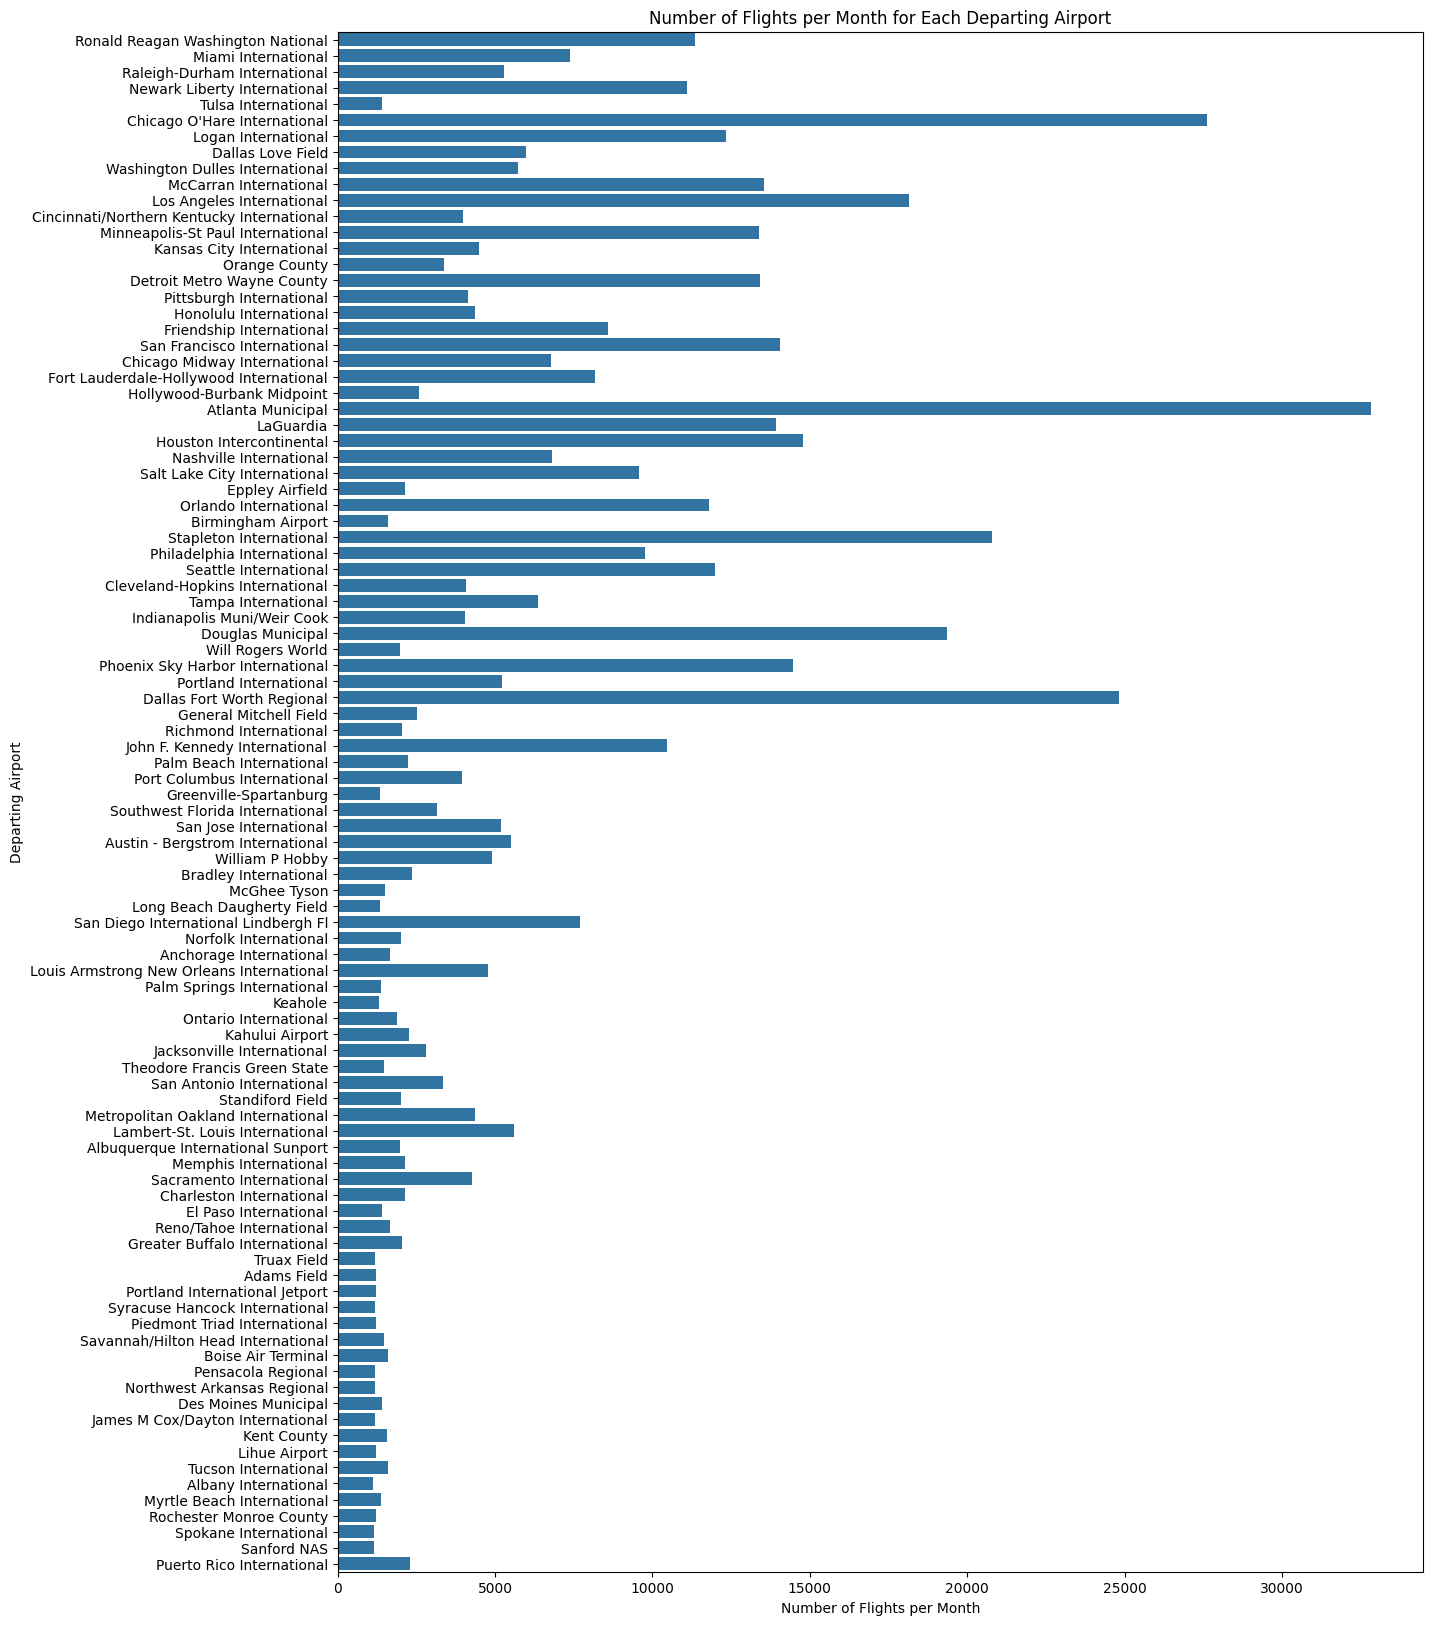

In [13]:
plt.figure(figsize=(14, 20))
sns.barplot(x='AIRPORT_FLIGHTS_MONTH', y='DEPARTING_AIRPORT', data=data, errorbar=None)
plt.title('Number of Flights per Month for Each Departing Airport')
plt.xlabel('Number of Flights per Month')
plt.ylabel('Departing Airport')
plt.show()

In [14]:
time_blocks_order = [
    'Early Morning & Late Night',  # 0001-0559
    'Morning',                     # 0600-1159
    'Afternoon',                   # 1200-1659
    'Evening',                     # 1700-1959
    'Night'                        # 2000-2359
]

data['PART_OF_DAY'] = pd.cut(
    data['DEP_TIME_BLK'].map(lambda x: int(x.split('-')[0])),
    bins=[0, 600, 1200, 1700, 2000, 2400],
    labels=time_blocks_order,
    right=False
)

data[["DEP_TIME_BLK", "PART_OF_DAY"]].head()

,DEP_TIME_BLK,PART_OF_DAY
0,1500-1559,Afternoon
1,2200-2259,Night
2,1900-1959,Evening
3,1700-1759,Evening
4,0800-0859,Morning


C:\Users\lequa\AppData\Local\Temp\ipykernel_28112\3479323662.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(


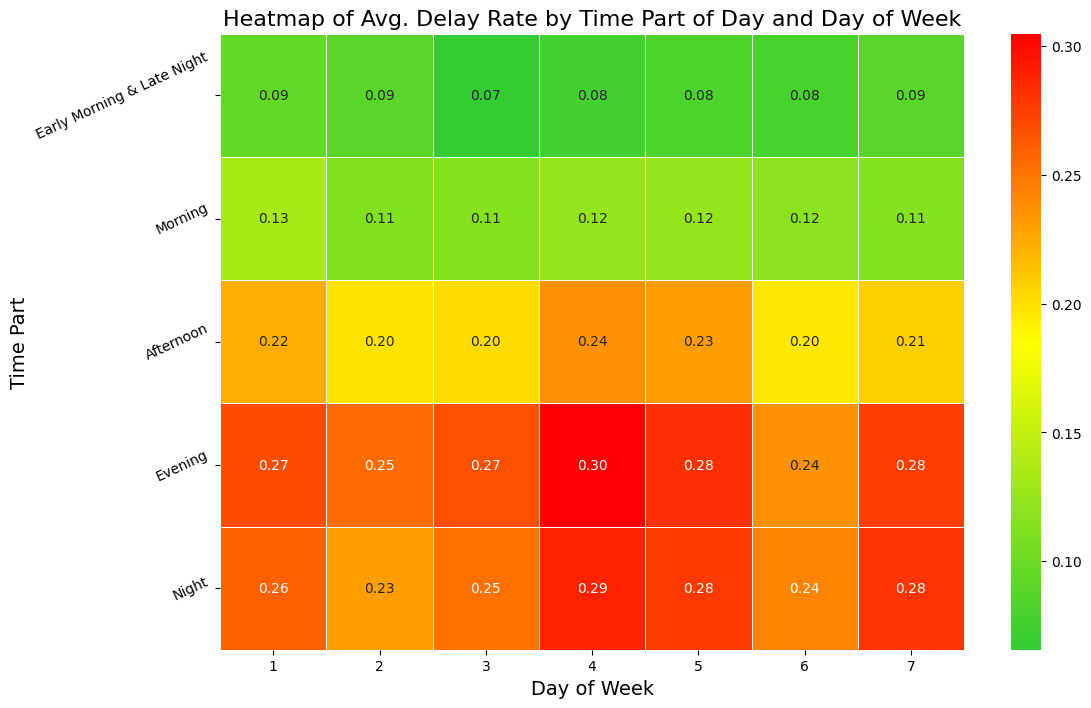

In [15]:
heatmap_data = pd.pivot_table(
    data,
    values='DEP_DEL15',
    index='PART_OF_DAY',
    columns='DAY_OF_WEEK',
    aggfunc='mean'
)

custom_cmap = LinearSegmentedColormap.from_list('custom', ['limegreen', 'yellow', 'red'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=.5)

plt.title('Heatmap of Avg. Delay Rate by Time Part of Day and Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Time Part', fontsize=14)
plt.yticks(rotation=25)
plt.show()

<Axes: title={'center': 'Max Tempartue Across Months - Line Plot'}, xlabel='Month', ylabel='Max Temparture (F)'>

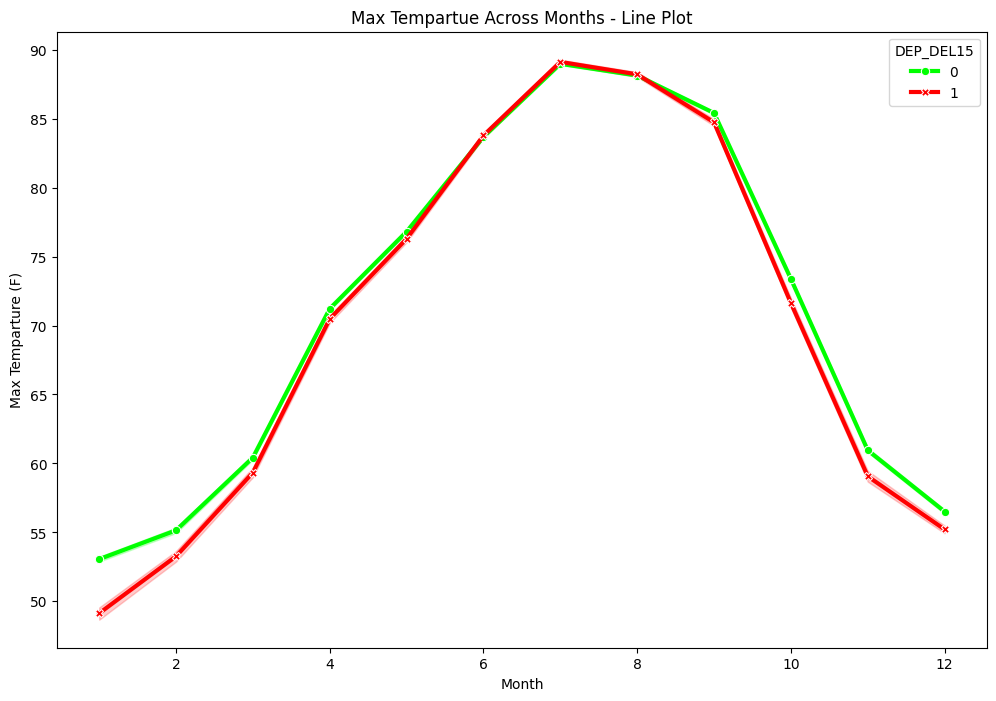

In [16]:
plt.figure(figsize=(12, 8))
plt.title("Max Tempartue Across Months - Line Plot")
plt.xlabel("Month")
plt.ylabel("Max Temparture (F)")
sns.lineplot(x = data.MONTH, y = data.TMAX, hue = data.DEP_DEL15, palette={0: 'lime', 1: 'red'}, style=data.DEP_DEL15, markers=True, dashes=False, linewidth = 3)

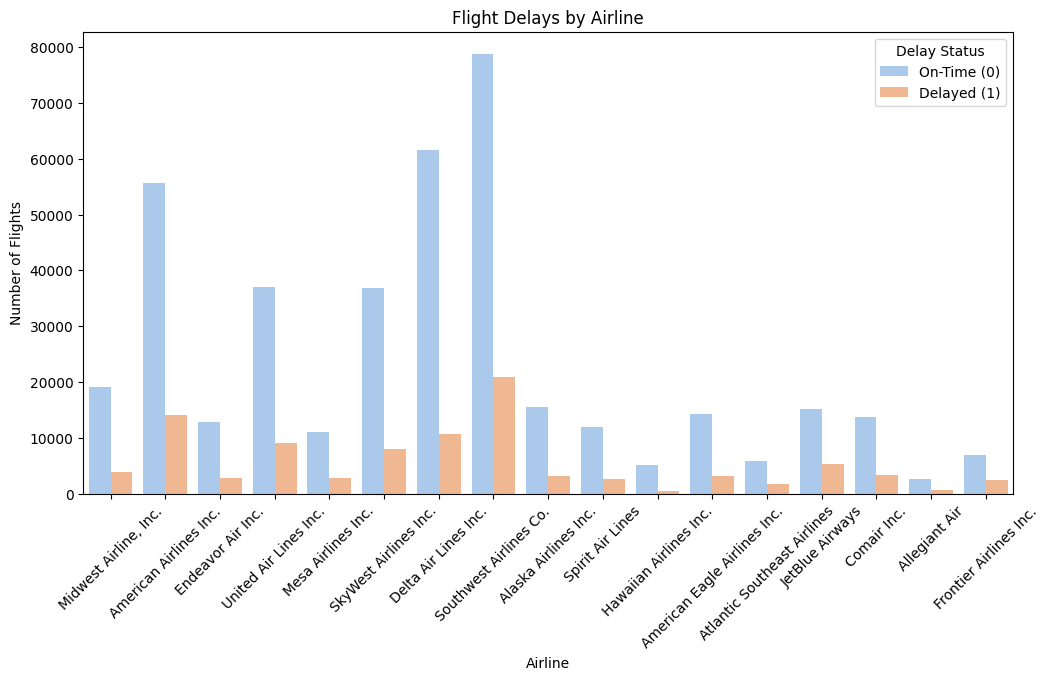

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CARRIER_NAME', hue='DEP_DEL15', data=data, palette='pastel')
plt.title('Flight Delays by Airline')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.xlabel('Airline')
plt.legend(title='Delay Status', labels=['On-Time (0)', 'Delayed (1)'])
plt.show()

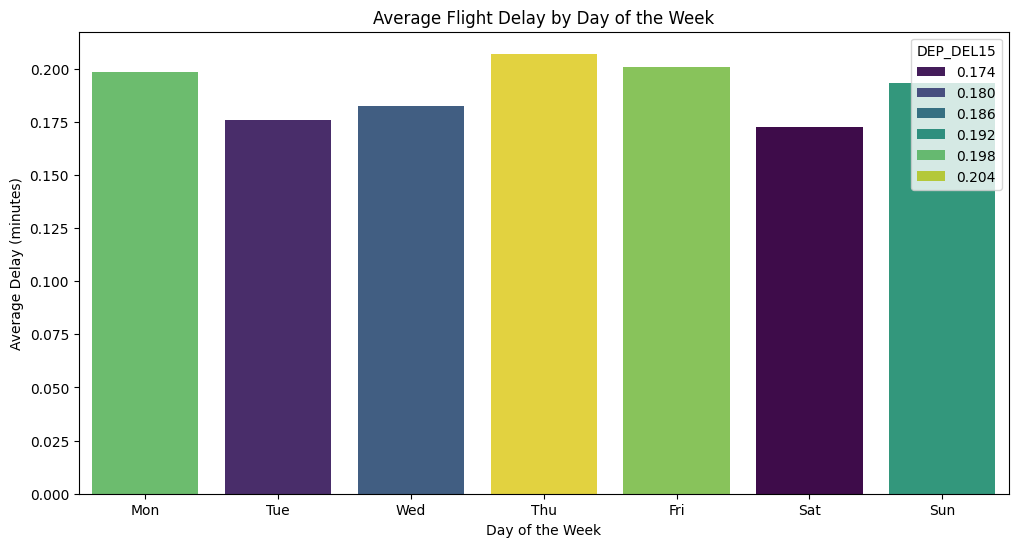

In [18]:
avg_delay_by_day = data.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='DAY_OF_WEEK', y='DEP_DEL15', data=avg_delay_by_day, palette='viridis', hue='DEP_DEL15')
plt.title('Average Flight Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

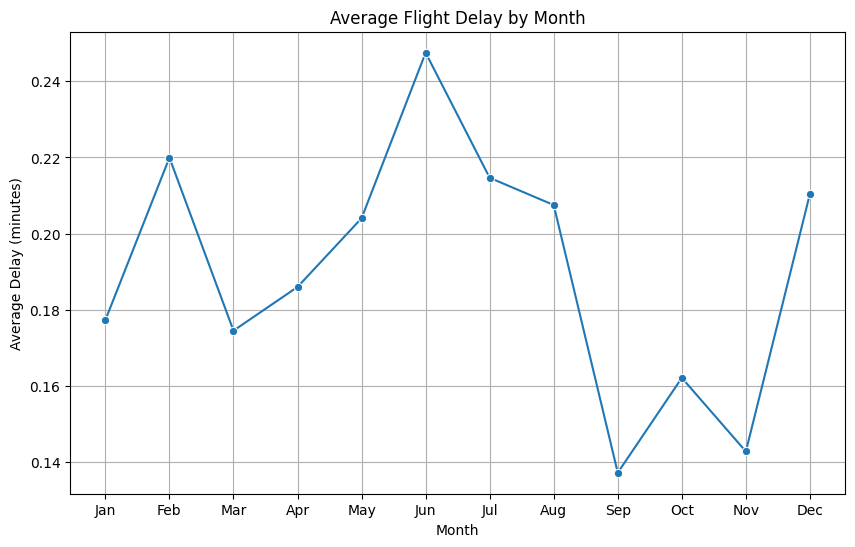

In [19]:
avg_delay_by_month = data.groupby('MONTH')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTH', y='DEP_DEL15', data=avg_delay_by_month, marker='o')
plt.title('Average Flight Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

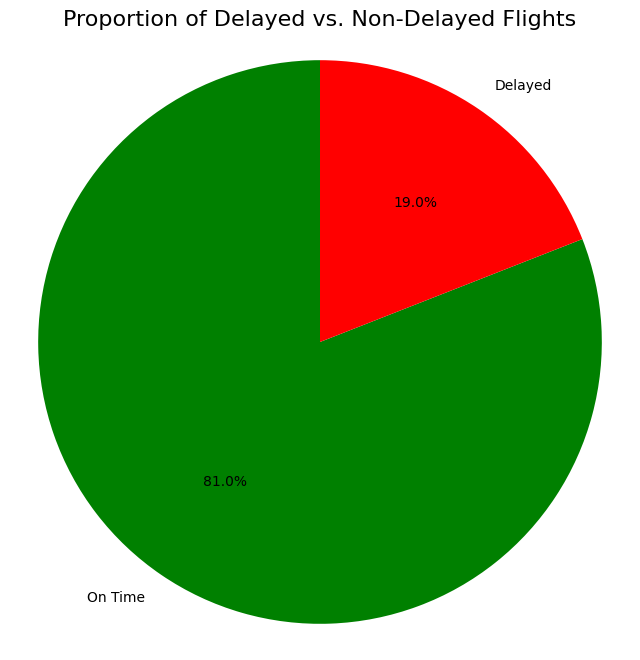

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(data['DEP_DEL15'].value_counts(), labels=['On Time', 'Delayed'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])

plt.title('Proportion of Delayed vs. Non-Delayed Flights', fontsize=16)
plt.axis('equal')

plt.show()

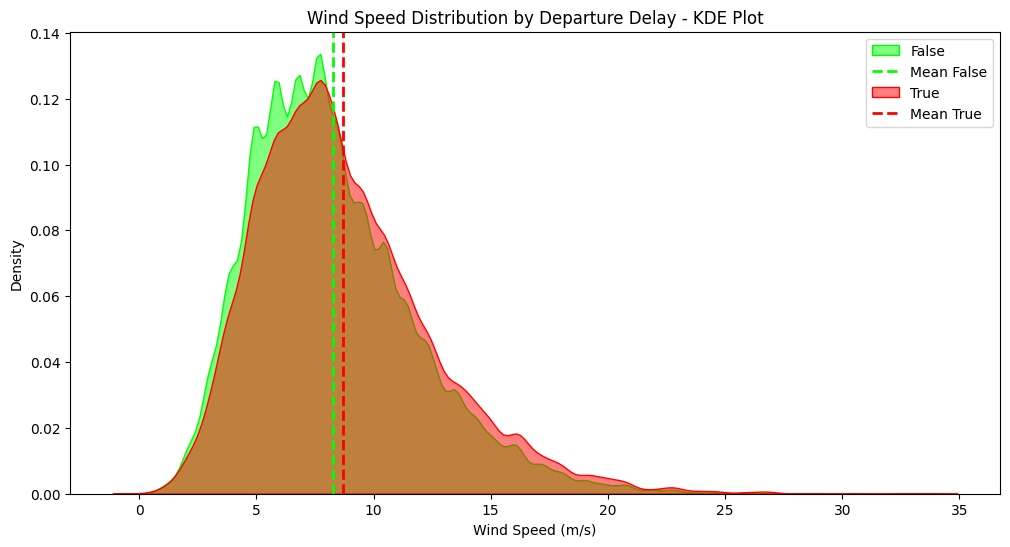

In [21]:
data_class0 = data[data['DEP_DEL15'] == 0]['AWND']
data_class1 = data[data['DEP_DEL15'] == 1]['AWND']
plt.figure(figsize=(12, 6))

sns.kdeplot(data_class0, color='lime', label='False', alpha=0.5, fill = True)
plt.axvline(data_class0.mean(), color='lime', linestyle='--', linewidth=2, label='Mean False')
sns.kdeplot(data_class1, color='red', label='True', alpha=0.5, fill = True)
plt.axvline(data_class1.mean(), color='red', linestyle='--', linewidth=2, label='Mean True')


plt.legend()
plt.title('Wind Speed Distribution by Departure Delay - KDE Plot')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.show()

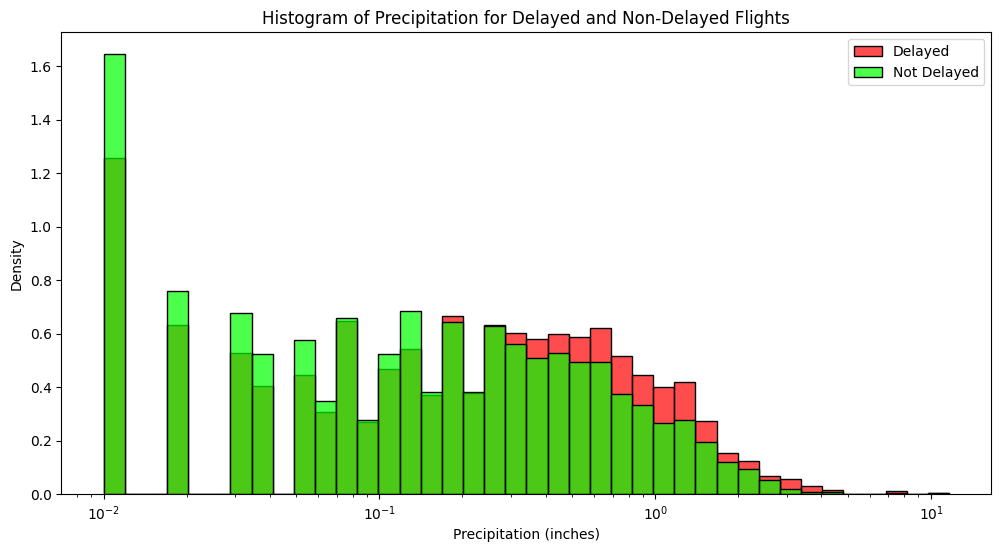

In [22]:
plt.figure(figsize=(12, 6))
df_delayed = data[data['DEP_DEL15'] == 1]
df_not_delayed = data[data['DEP_DEL15'] == 0]
sns.histplot(df_delayed['PRCP'], color='red', label='Delayed', stat="density", bins=40, alpha=0.7, log_scale = True)
sns.histplot(df_not_delayed['PRCP'], color='lime', label='Not Delayed', stat="density", bins=40, alpha=0.7, log_scale = True)
plt.title('Histogram of Precipitation for Delayed and Non-Delayed Flights')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [23]:
block_num = {
    'Early Morning & Late Night': 1,
    'Morning' : 2,
    'Afternoon' : 3,
    'Evening' : 4,
    'Night' : 5
}
data['PART_OF_DAY'] = data['PART_OF_DAY'].map(block_num)
data[['DEP_TIME_BLK' ,'PART_OF_DAY']].head()

,DEP_TIME_BLK,PART_OF_DAY
0,1500-1559,3
1,2200-2259,5
2,1900-1959,4
3,1700-1759,4
4,0800-0859,2


In [24]:
X = data[["PRCP", "AWND", "SNOW", "SNWD", "SEGMENT_NUMBER", "PART_OF_DAY"]].to_numpy()
    
y = data["DEP_DEL15"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)  # Scale testing data

In [26]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

In [27]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test_scaled)

In [28]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log_reg = log_reg_model.predict(X_test)


In [29]:
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model Evaluation:
Accuracy: 0.8049439281319715
F1 Score: 0.19469684453989758

Confusion Matrix:
 [[78106  2923]
 [16575  2357]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89     81029
           1       0.45      0.12      0.19     18932

    accuracy                           0.80     99961
   macro avg       0.64      0.54      0.54     99961
weighted avg       0.75      0.80      0.76     99961



In [30]:
print("\nGradient Boosting Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Model Evaluation:
Accuracy: 0.8125468932883825
F1 Score: 0.05592503022974607

Confusion Matrix:
 [[80668   361]
 [18377   555]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     81029
           1       0.61      0.03      0.06     18932

    accuracy                           0.81     99961
   macro avg       0.71      0.51      0.48     99961
weighted avg       0.77      0.81      0.74     99961



In [31]:
accuracy = accuracy_score(y_test, y_pred_log_reg)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
class_report = classification_report(y_test, y_pred_log_reg)

# Print the evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8107561949160172

Confusion Matrix:
 [[80858   171]
 [18746   186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     81029
           1       0.52      0.01      0.02     18932

    accuracy                           0.81     99961
   macro avg       0.67      0.50      0.46     99961
weighted avg       0.76      0.81      0.73     99961



In [32]:
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
r2 = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 0.1951
Mean Absolute Error (MAE): 0.1951
Root Mean Squared Error (RMSE): 0.4417
R² Score: -0.2705


c:\Users\lequa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
mse = mean_squared_error(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)
rmse = mean_squared_error(y_test, y_pred_gb, squared=False)
r2 = r2_score(y_test, y_pred_gb)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 0.1875
Mean Absolute Error (MAE): 0.1875
Root Mean Squared Error (RMSE): 0.4330
R² Score: -0.2210


c:\Users\lequa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
mse = mean_squared_error(y_test, y_pred_log_reg)
mae = mean_absolute_error(y_test, y_pred_log_reg)
rmse = mean_squared_error(y_test, y_pred_log_reg, squared=False)
r2 = r2_score(y_test, y_pred_log_reg)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 0.1892
Mean Absolute Error (MAE): 0.1892
Root Mean Squared Error (RMSE): 0.4350
R² Score: -0.2327


c:\Users\lequa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


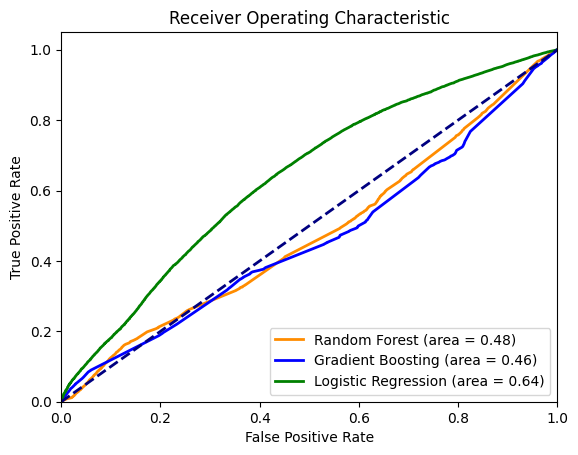

In [35]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])
log_reg_roc_auc = auc(log_reg_fpr, log_reg_tpr)

# Existing code for Random Forest and Gradient Boosting
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
gb_roc_auc = auc(gb_fpr, gb_tpr)

# Plotting the ROC curves
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(gb_fpr, gb_tpr, color='blue', lw=2, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot(log_reg_fpr, log_reg_tpr, color='green', lw=2, label='Logistic Regression (area = %0.2f)' % log_reg_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

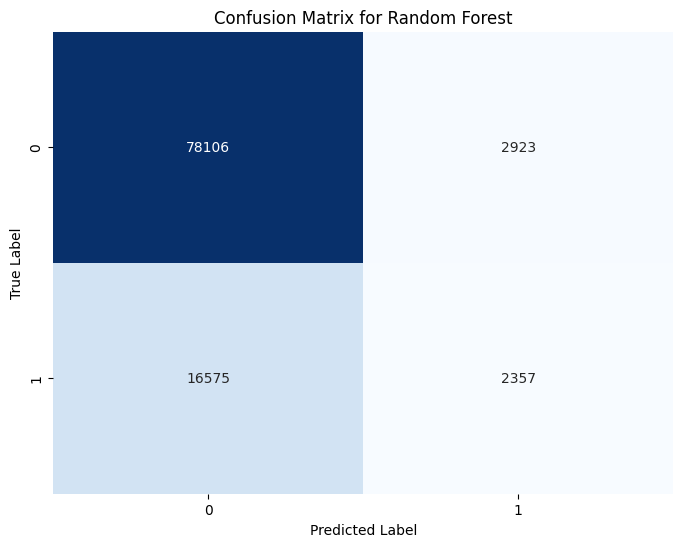

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

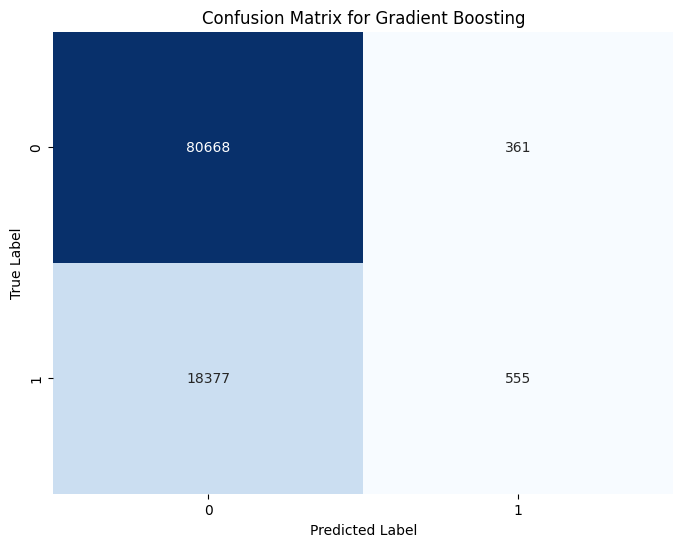

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

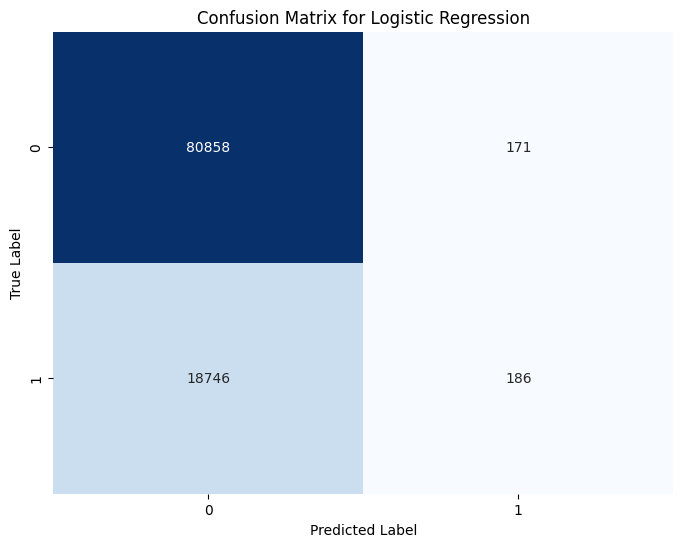

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

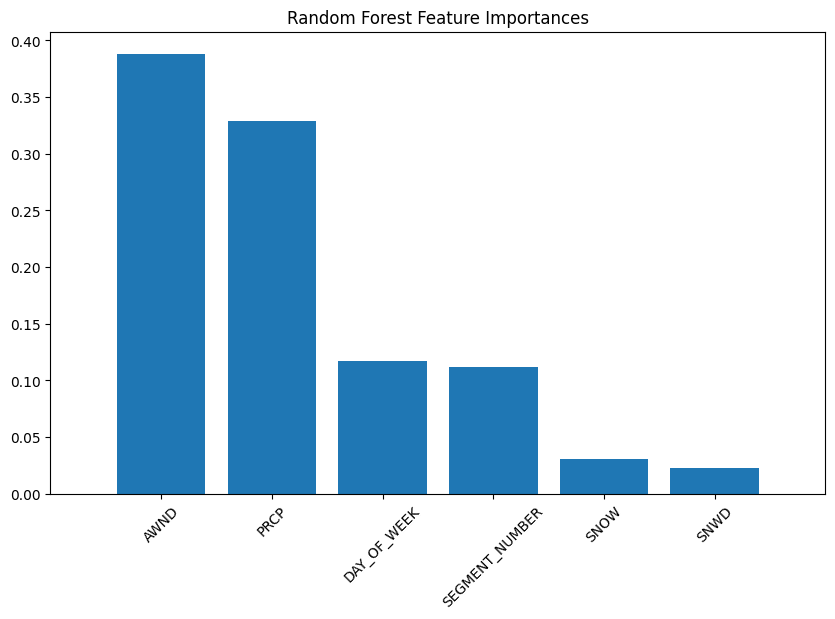

In [39]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(["PRCP", "AWND", "SNOW", "SNWD", "SEGMENT_NUMBER", "DAY_OF_WEEK"])[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()